In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
#from app.styles import Estilos, colores
import matplotlib.dates as mdates
aux = np.load('/home/richard/Escritorio/datos/database.npz', allow_pickle='TRUE')
n_block = aux['n_block']
time_b = aux['time_b']
size = aux['size']
ntx = aux['ntx']
bits = aux['bits']
chainwork = aux['chainwork']
strippedsize = aux['strippedsize']
weight = aux['weight']
total = aux['total']


In [10]:
FECHAS = pd.to_datetime(time_b)
print(FECHAS[2]) 
print(type(FECHAS))
print(type(FECHAS[2]))

2009-01-09 03:02:53
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


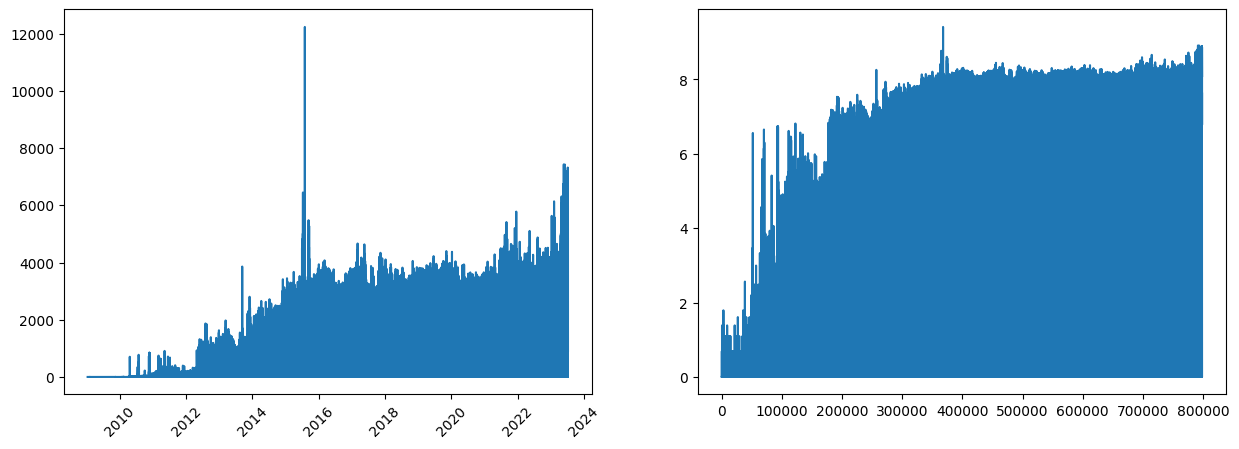

In [12]:
#===========NTX VS FECHAS

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FECHAS,ntx,label="transacciones  vs tiempo")
plt.xticks(rotation=45)

#============NTX VS N_BLOCK
plt.subplot(1,2,2)
indice=np.where((ntx==np.max(ntx)))[0][0]
ntx_max=ntx[indice]

indice2=np.where((ntx==np.min(ntx)))[0][0]
ntx_min=ntx[indice]

#plt.scatter(n_block[indice], ntx_max, color ='blue',label='Máximo', s=20)
#plt.scatter(n_block[indice2], ntx_min, color ='orange',label='Minimo', s=20)
plt.plot(n_block,np.log(ntx) ,label="numero de trans, por bloque")#, s=0.1,alpha=0.8)

plt.show()


3813419
0.008333332240700679


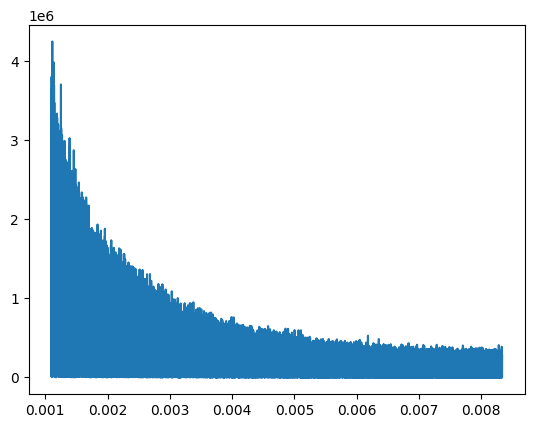

In [40]:
tiempo_segundos=(FECHAS-FECHAS[0]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado=np.arange(tiempo_segundos[0],tiempo_segundos[-1],60)
#creamos tiempos equiespaciados
ntx_interpolado=np.interp(tiempo_equiespaciado,tiempo_segundos,ntx)
#interpolamos las transacciones
transformada=np.fft.fft(ntx_interpolado)
#trabajamos las trans interpoladas
frecuencias=np.fft.fftfreq(len(ntx_interpolado),d=(60))
#TTF=transformada[transformada>0]
FRE=frecuencias[frecuencias>0]
print(len(FRE))
print(np.max(FRE))
#plt.plot(frecuencias[11000:], np.abs(transformada[11000:]), color='r')
plt.plot(FRE[500000:],np.abs(transformada[500000:3813419]))#, np.abs(transformada[11000:]), color='r')
#print(len(transformada))
#print(len(ntx_interpolado))
#print(tiempo_segundos[0]-tiempo_segundos[-1])
#print(tiempo_segundos[2])

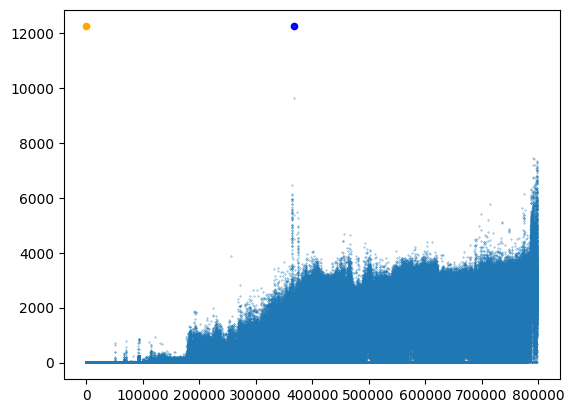

In [30]:
#=======NTX VS N_BLOCKS
fig, ax = plt.subplots()
indice=np.where((ntx==np.max(ntx)))[0][0]
ntx_max=ntx[indice]

indice2=np.where((ntx==np.min(ntx)))[0][0]
ntx_min=ntx[indice]


ax.scatter(n_block[indice], ntx_max, color ='blue',label='Máximo', s=20)
ax.scatter(n_block[indice2], ntx_min, color ='orange',label='Minimo', s=20)
ax.scatter(n_block,ntx ,label="numero de trans, por bloque", s=0.1,alpha=0.8)

399133
798268
798268
399123
399124
0.0131409501570901 0.013139697444968356
399133 ACA
399135


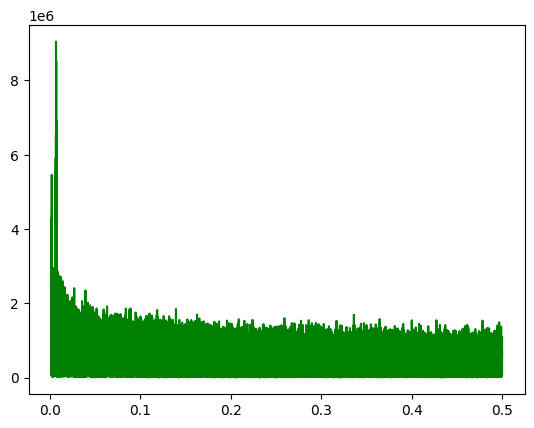

In [3]:
#=======TRANFORMADA SIN INTERPOLACION=======

tiempo_segundosT=(n_block[:]-n_block[0])

transformadaT=np.fft.fft(ntx[:])

frecuenciasT=np.fft.fftfreq(len(ntx[:]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))

plt.plot(FREK4[1000:], np.abs(transformadaT[1000:399133]), color='g')
print(len(frecuenciasT))
print(np.argmax(frecuenciasT[10:]))
print(np.argmin(frecuenciasT[10:]))
print(frecuenciasT[10490],frecuenciasT[10489])
print(len(FREK4),'ACA')
print(len(frecuenciasT[399133:]))

84133
168268


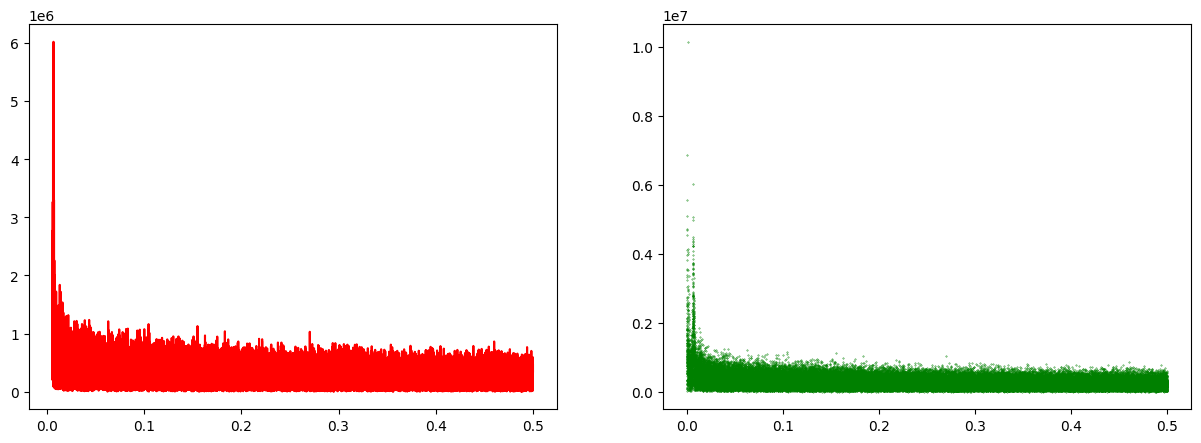

In [46]:
tiempo_segundosT=(n_block[630000:]-n_block[630000])

transformadaT=np.fft.fft(ntx[630000:])

frecuenciasT=np.fft.fftfreq(len(ntx[630000:]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[1000:], np.abs(transformadaT[1000:84133]), color='r')
plt.subplot(1,2,2)
plt.scatter(FREK4[10:], np.abs(transformadaT[10:84133]), color='g',s=0.1)

84133
168268


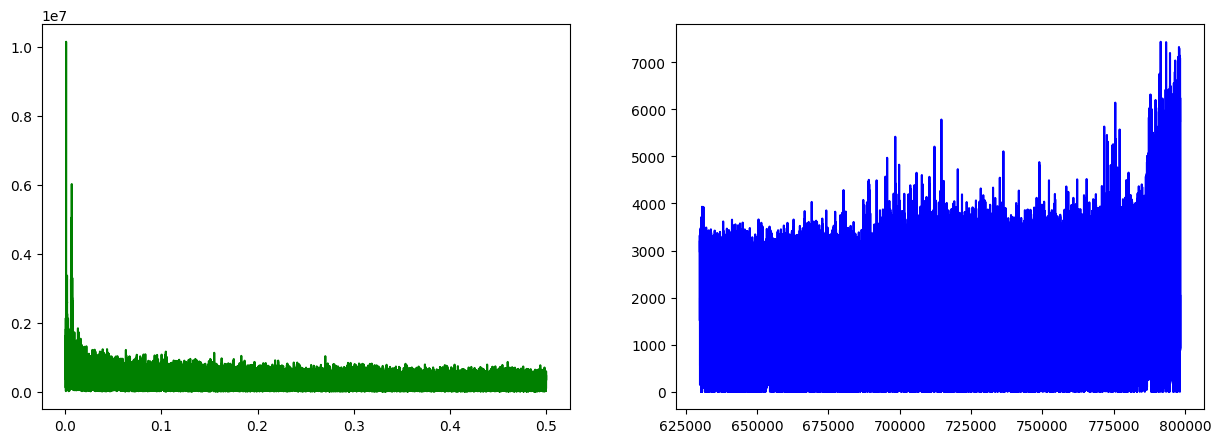

In [11]:
tiempo_segundosT=(n_block[630000:]-n_block[630000])

transformadaT=np.fft.fft(ntx[630000:])

frecuenciasT=np.fft.fftfreq(len(ntx[630000:]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))

#plt.plot(FREK4[100:], np.abs(transformadaT[100:10499]), color='g')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[100:], np.abs(transformadaT[100:84133]), color='g')
plt.subplot(1,2,2)
#plt.scatter(n_block[42000:63000],ntx[42000:63000],color='b',s=0.2)
plt.plot(n_block[630000:],ntx[630000:],color='b')


104999
210000


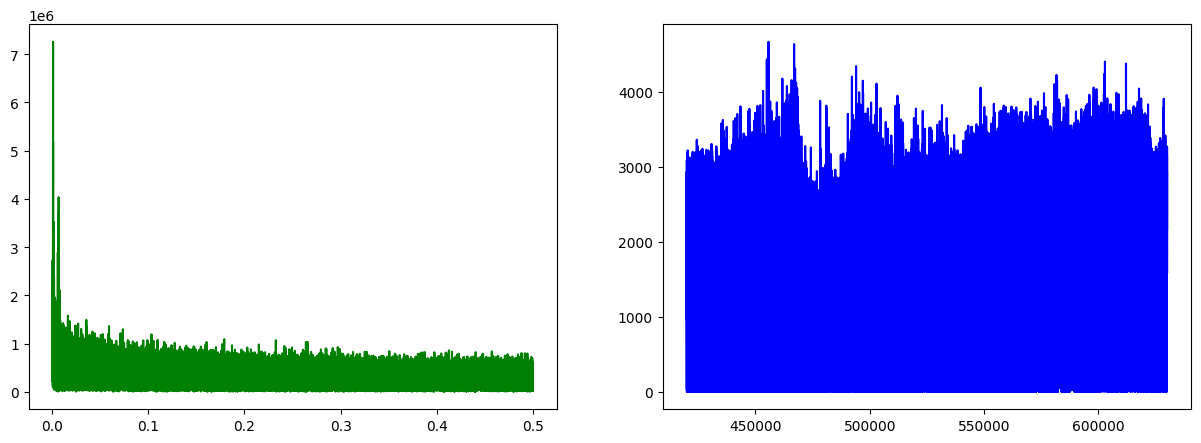

In [15]:
tiempo_segundosT=(n_block[420000:630000]-n_block[420000])

transformadaT=np.fft.fft(ntx[420000:630000])

frecuenciasT=np.fft.fftfreq(len(ntx[420000:630000]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))

#plt.plot(FREK4[100:], np.abs(transformadaT[100:10499]), color='g')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[100:], np.abs(transformadaT[100:104999]), color='g')
plt.subplot(1,2,2)
#plt.scatter(n_block[42000:63000],ntx[42000:63000],color='b',s=0.2)
plt.plot(n_block[420000:630000],ntx[420000:630000],color='b')


104999
210000


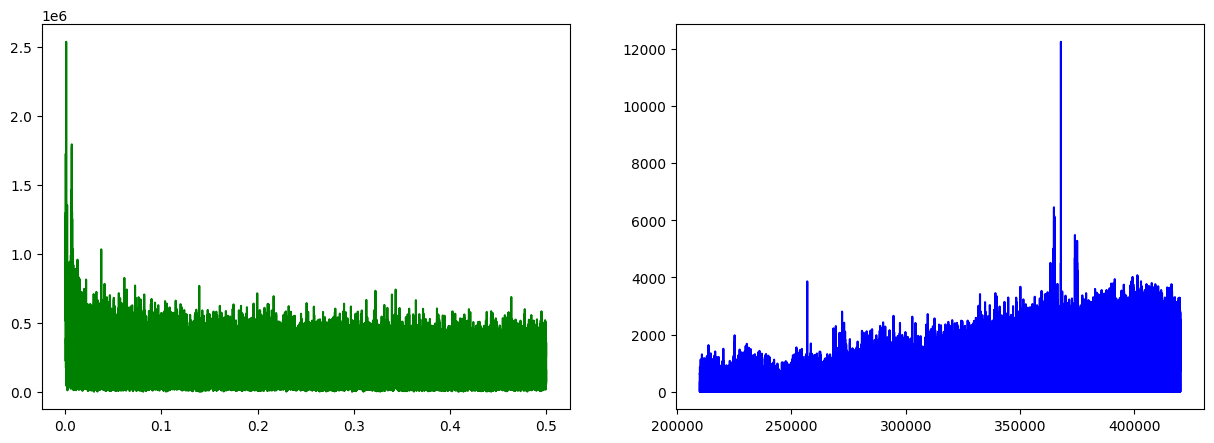

In [5]:
tiempo_segundosT=(n_block[210000:420000]-n_block[210000])

transformadaT=np.fft.fft(ntx[210000:420000])

frecuenciasT=np.fft.fftfreq(len(ntx[210000:420000]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))

#plt.plot(FREK4[10:], np.abs(transformadaT[10:10499]), color='g')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[100:], np.abs(transformadaT[100:104999]), color='g')
plt.subplot(1,2,2)
plt.plot(n_block[210000:420000],ntx[210000:420000],color='b')

104999
210000


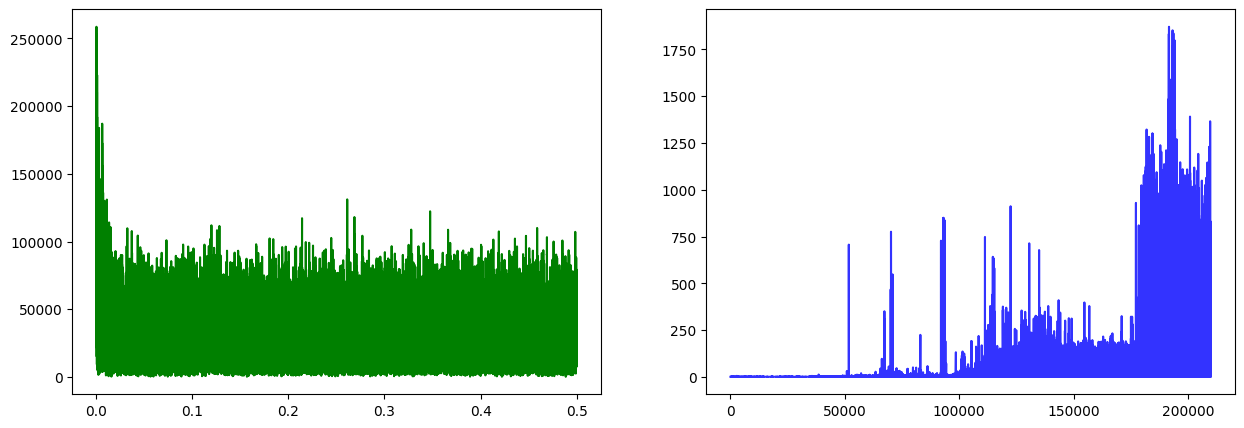

In [6]:
tiempo_segundosT=(n_block[:210000]-n_block[0])

transformadaT=np.fft.fft(ntx[:210000])

frecuenciasT=np.fft.fftfreq(len(ntx[:210000]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))
#plt.plot(FREK4[10:], transformadaT[10:10499], color='r')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[100:], np.abs(transformadaT[100:104999]), color='g')
plt.subplot(1,2,2)
plt.plot(n_block[0:210000],ntx[0:210000],color='b',alpha=0.8)


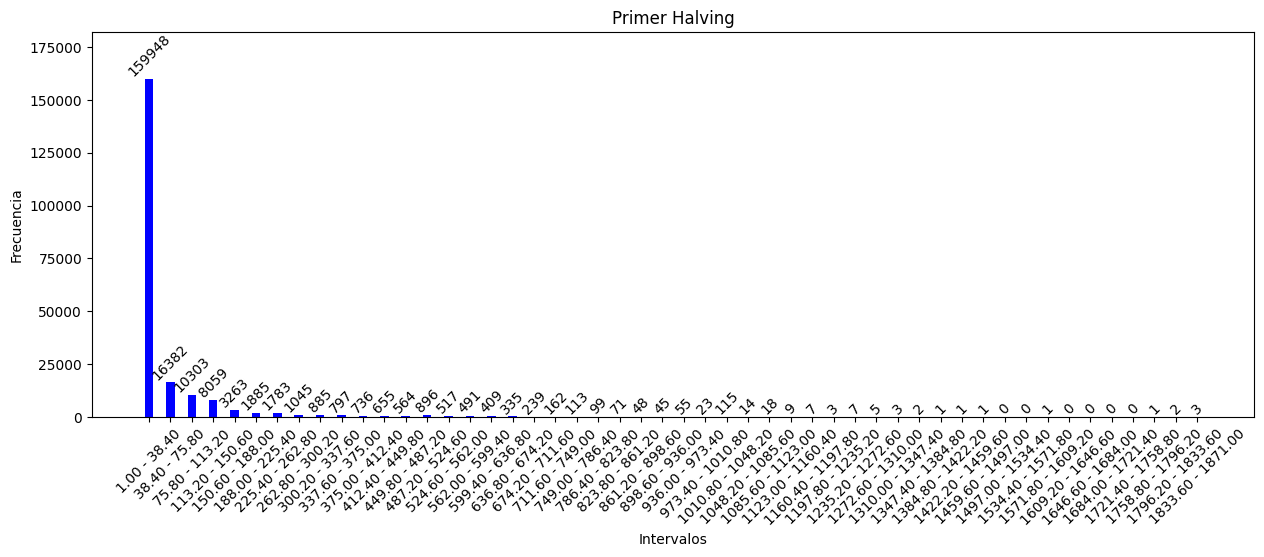

In [34]:
# print(max(ntx[:21000]))
# print(len(ntx[:]))
# print(np.argmax(ntx))
# print(np.argmax(ntx[:210]),'ACA')
# print(time_b[367852])
# print(np.mean(ntx[:210000]),'PROMEDIO')
plt.figure(figsize=(15, 5))
hist, edges = np.histogram(ntx[:210001],bins=50)

#plt.bar(range(0, 50), hist, color='g',width=0.4)
plt.bar(range(0, 50), hist, color='b',width=0.4)

for i, freq in enumerate(hist):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=10, color='black',rotation=45)
interval_labels = [f'{edges[i]:.2f} - {edges[i+1]:.2f}' for i in range(len(edges)-1)]
plt.xticks(range(50), interval_labels,rotation=45 )

plt.xlabel('Intervalos')
plt.ylim(0,182000)
plt.ylabel('Frecuencia')
plt.title('Primer Halving')
plt.show()

628.7960771615374 PROMEDIO


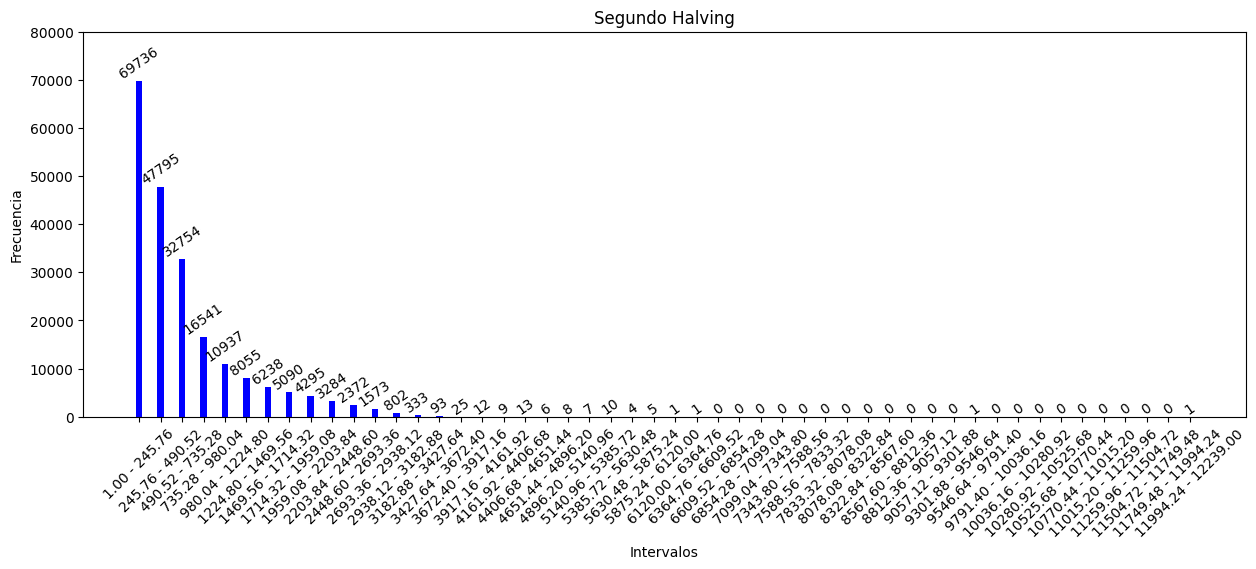

In [30]:
print(np.mean(ntx[210000:420001]),'PROMEDIO')
plt.figure(figsize=(15, 5))
hist, edges = np.histogram(ntx[210000:420001],bins=50)

plt.bar(range(0, 50), hist, color='b',width=0.3)

for i, freq in enumerate(hist):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=10, color='black',rotation=35)
interval_labels = [f'{edges[i]:.2f} - {edges[i+1]:.2f}' for i in range(len(edges)-1)]
plt.xticks(range(50), interval_labels,rotation=45 )

plt.xlabel('Intervalos')
plt.ylim(0,80000)
plt.ylabel('Frecuencia')
plt.title('Segundo Halving')
plt.show()


1846.2079466288255 PROMEDIO


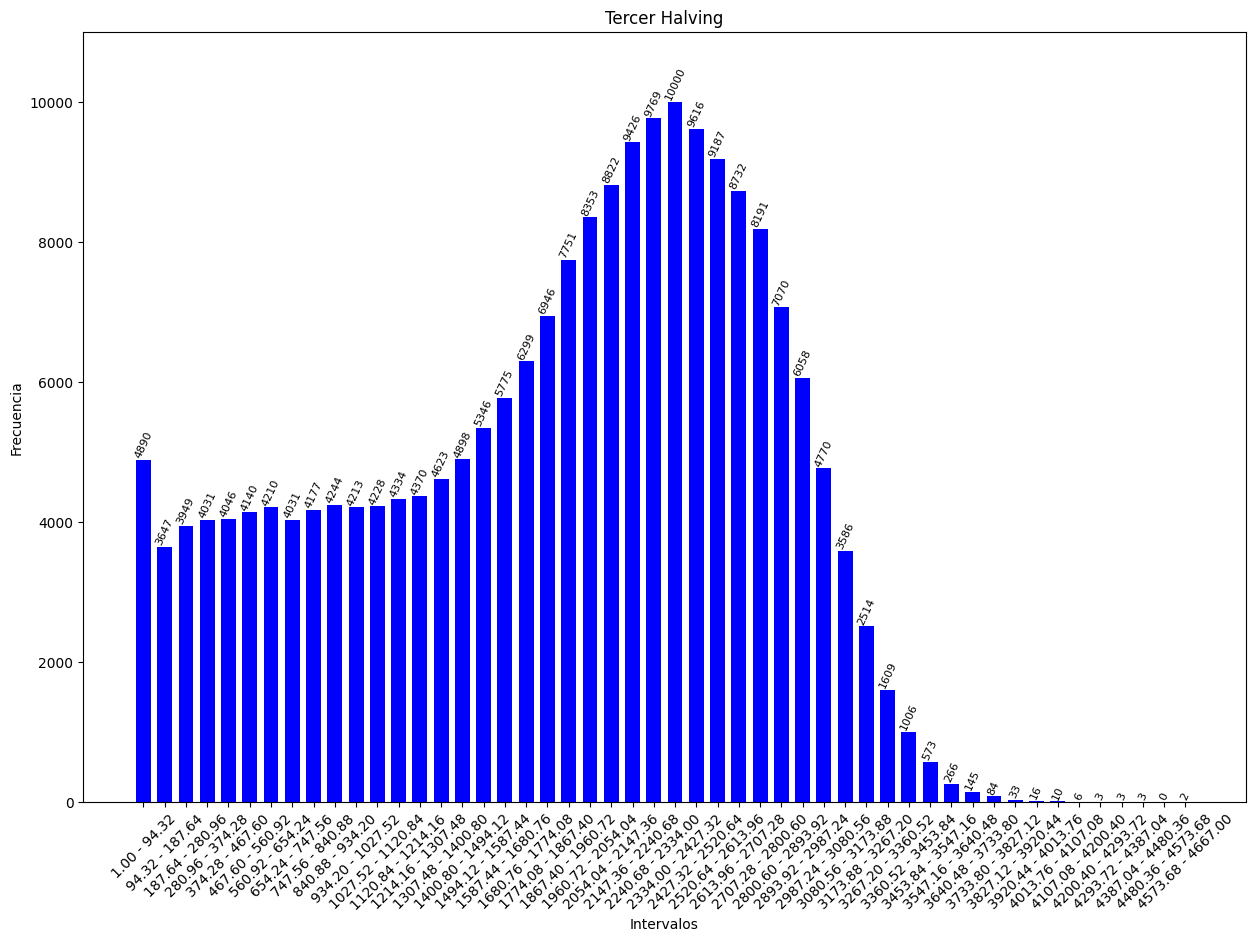

In [26]:
print(np.mean(ntx[420000:630001]),'PROMEDIO')
plt.figure(figsize=(15, 10))
hist, edges = np.histogram(ntx[420000:630001],bins=50)

plt.bar(range(0, 50), hist, color='b',width=0.7)

for i, freq in enumerate(hist):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=8, color='black',rotation=65)
interval_labels = [f'{edges[i]:.2f} - {edges[i+1]:.2f}' for i in range(len(edges)-1)]
plt.xticks(range(50), interval_labels,rotation=45 )

plt.xlabel('Intervalos')
plt.ylim(0,11000)
plt.ylabel('Frecuencia')
plt.title('Tercer Halving')
plt.show()


2112.0 PROMEDIO
3228.4206349206347 PROMEDIO


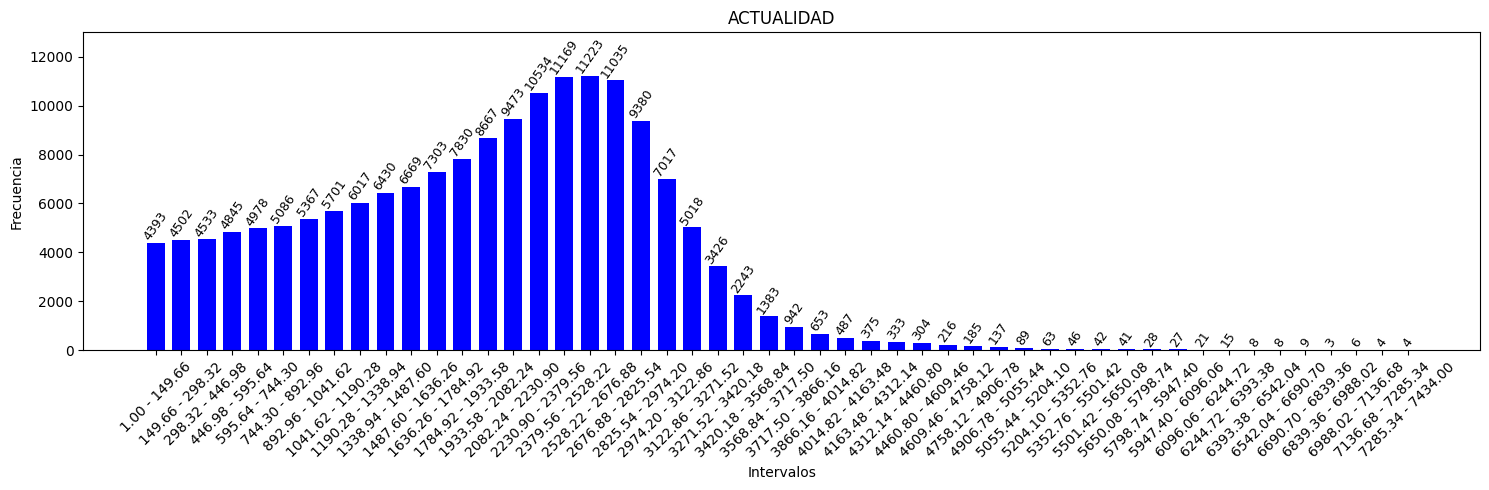

In [27]:

plt.figure(figsize=(15, 5))
hist, edges = np.histogram(ntx[630000:],bins=50)
print(np.median(ntx[630000:]),'PROMEDIO')
print(np.mean(ntx[-1008:]),'PROMEDIO')

plt.bar(range(0, 50), hist, color='b',width=0.7)

for i, freq in enumerate(hist):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=9, color='black',rotation=55)
interval_labels = [f'{edges[i]:.2f} - {edges[i+1]:.2f}' for i in range(len(edges)-1)]
plt.xticks(range(50), interval_labels,rotation=45 )

plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.ylim(0,13000)
plt.title('ACTUALIDAD')
plt.tight_layout()
plt.show()

6652
13305


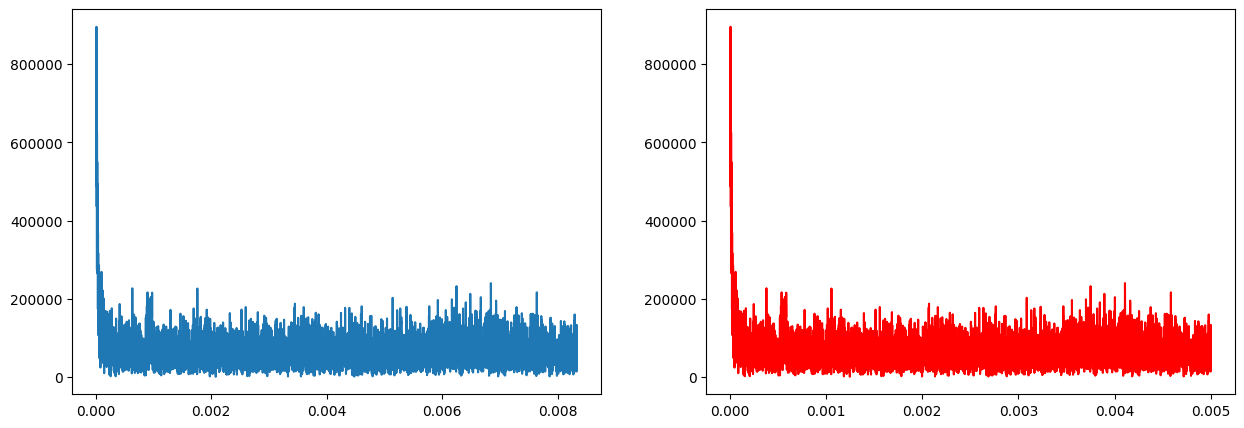

In [59]:

tiempo_segundos=(n_block-n_block[0])
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado=np.arange(tiempo_segundos[0],tiempo_segundos[-1],60)
#creamos tiempos equiespaciados
ntx_interpolado=np.interp(tiempo_equiespaciado,tiempo_segundos,ntx)
#interpolamos las transacciones
transformada=np.fft.fft(ntx_interpolado)
#trabajamos las trans interpoladas
frecuencias=np.fft.fftfreq(len(ntx_interpolado),d=(60))
frecuenciass=np.fft.fftfreq(len(ntx_interpolado),d=(100))
#TTF=transformada[transformada>0]
FRE=frecuencias[frecuencias>0]
FREQ=frecuenciass[frecuenciass>0]
print(len(FRE))
print(len(transformada))
#plt.plot(frecuencias[11000:], np.abs(transformada[11000:]), color='r')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FRE[10:],np.abs(transformada[10:6652]))#, np.abs(transformada[11000:]), color='r')#6652
plt.subplot(1,2,2)
plt.plot(FREQ[10:],np.abs(transformada[10:6652]),color='r')
#print(len(ntx_interpolado))
#print(tiempo_segundos[0]-tiempo_segundos[-1])
#print(tiempo_segundos[2])


6652
13305


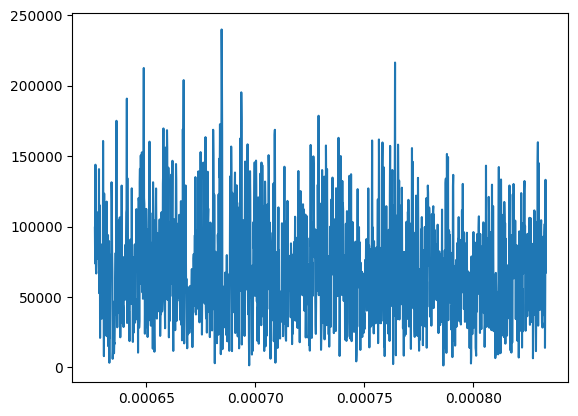

In [59]:
tiempo_segundos=(n_block-n_block[0])
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado=np.arange(tiempo_segundos[0],tiempo_segundos[-1],60)
#creamos tiempos equiespaciados
ntx_interpolado=np.interp(tiempo_equiespaciado,tiempo_segundos,ntx)
#interpolamos las transacciones
transformada=np.fft.fft(ntx_interpolado)
#trabajamos las trans interpoladas
frecuencias=np.fft.fftfreq(len(ntx_interpolado),d=(600))
#TTF=transformada[transformada>0]
FRE=frecuencias[frecuencias>0]
print(len(FRE))
print(len(transformada))
#plt.plot(frecuencias[11000:], np.abs(transformada[11000:]), color='r')
plt.plot(FRE[5000:],np.abs(transformada[5000:6652]))#, np.abs(transformada[11000:]), color='r')
#plt.fill_between(FRE[6300:],np.abs(transformada[6300:6652]))#, np.abs(transformada[11000:]), color='r')